In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357288 sha256=59b3b9c994280d062bd075ae681f0765ecb7a97da2fee4e5e3f89de366d1c72b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("A20000476_shahd_dataset.csv")
print(dataset.head())
dataset.set_index(dataset.columns[0], inplace=True)
dataset = dataset.applymap(lambda x: np.clip(x, 1, 5))
print(dataset.head())

  Unnamed: 0  Grand Theft Auto V  The Witcher 3: Wild Hunt  Portal 2  \
0     User_1                 5.0                       4.0       3.0   
1     User_2                 4.0                       4.0       3.0   
2     User_3                 5.0                       4.0       2.0   
3     User_4                 2.0                       4.0       2.0   
4     User_5                 2.0                       1.0       3.0   

   Counter-Strike: Global Offensive  Tomb Raider (2013)  Portal  \
0                               4.0                 1.0     1.0   
1                               3.0                 1.0     1.0   
2                               5.0                 5.0     2.0   
3                               1.0                 5.0     2.0   
4                               5.0                 1.0     5.0   

   Left 4 Dead 2  The Elder Scrolls V: Skyrim  Red Dead Redemption 2  \
0            3.0                          NaN                    4.0   
1            4.0    

<ipython-input-3-1751d0017579>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda x: np.clip(x, 1, 5))


In [4]:
Tnu = dataset.shape[0]
print("Total number of users (Tnu):", Tnu)
Tni = dataset.shape[1]
print("Total number of items (Tni):", Tni)


Total number of users (Tnu): 50
Total number of items (Tni): 10


In [5]:
ratings_per_item = dataset.notnull().sum()
print("Ratings per product (game):\n", ratings_per_item)

Ratings per product (game):
 Grand Theft Auto V                  45
The Witcher 3: Wild Hunt            41
Portal 2                            47
Counter-Strike: Global Offensive    44
Tomb Raider (2013)                  44
Portal                              48
Left 4 Dead 2                       45
The Elder Scrolls V: Skyrim         40
Red Dead Redemption 2               44
BioShock Infinite                   41
dtype: int64


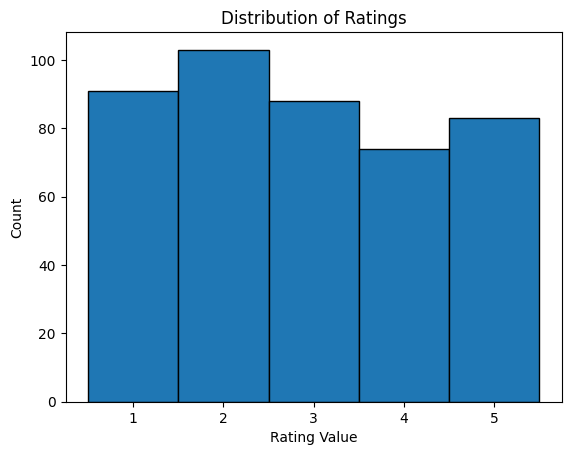

In [6]:
all_ratings = dataset.values.flatten()
plt.hist(all_ratings, bins=np.arange(1, 7) - 0.5, edgecolor='black')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(range(1, 6))
plt.show()

In [7]:
total_elements = dataset.size
non_zero_elements = dataset.notnull().sum().sum()
sparsity = (1 - (non_zero_elements / total_elements)) * 100
print(f"Matrix Sparsity: {sparsity:.2f}%")

Matrix Sparsity: 12.20%


In [8]:
average_rating_per_user = dataset.mean(axis=1)
print("Average Ratings Per User:\n", average_rating_per_user.describe())

Average Ratings Per User:
 count    50.000000
mean      2.896905
std       0.463438
min       1.888889
25%       2.559524
50%       2.881944
75%       3.243056
max       3.800000
dtype: float64


In [9]:
lowest_rated_items = ratings_per_item.nsmallest(2).index
I1, I2 = lowest_rated_items
print("Target Items: I1 =", I1, "I2 =", I2)

Target Items: I1 = The Elder Scrolls V: Skyrim I2 = The Witcher 3: Wild Hunt


In [10]:
avg_I1 = dataset[I1].mean()
avg_I2 = dataset[I2].mean()
print("Average Rating of I1:", avg_I1)
print("Average Rating of I2:", avg_I2)

Average Rating of I1: 2.7
Average Rating of I2: 2.8536585365853657


In [11]:
dataset[I1] = dataset[I1].fillna(avg_I1)
dataset[I2] = dataset[I2].fillna(avg_I2)

In [12]:
centered_matrix = dataset.subtract(dataset.mean(axis=0), axis=1)
covariance_matrix = centered_matrix.cov()
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
                                   Grand Theft Auto V  \
Grand Theft Auto V                          1.982828   
The Witcher 3: Wild Hunt                   -0.083309   
Portal 2                                    0.068660   
Counter-Strike: Global Offensive            0.008097   
Tomb Raider (2013)                          0.248313   
Portal                                      0.168328   
Left 4 Dead 2                               0.409615   
The Elder Scrolls V: Skyrim                 0.171515   
Red Dead Redemption 2                       0.014170   
BioShock Infinite                          -0.458037   

                                  The Witcher 3: Wild Hunt  Portal 2  \
Grand Theft Auto V                               -0.083309  0.068660   
The Witcher 3: Wild Hunt                          1.696366  0.196589   
Portal 2                                          0.196589  1.650324   
Counter-Strike: Global Offensive                  0.546666 -0.266463   
Tom

In [13]:
top_5_peers_I1 = covariance_matrix[I1].nlargest(6).iloc[1:]
top_5_peers_I2 = covariance_matrix[I2].nlargest(6).iloc[1:]
top_10_peers_I1 = covariance_matrix[I1].nlargest(11).iloc[1:]
top_10_peers_I2 = covariance_matrix[I2].nlargest(11).iloc[1:]

print("Top 5 Peers for I1:\n", top_5_peers_I1)
print("Top 10 Peers for I1:\n", top_10_peers_I1)
print("Top 5 Peers for I2:\n", top_5_peers_I2)
print("Top 10 Peers for I2:\n", top_10_peers_I2)

Top 5 Peers for I1:
 BioShock Infinite           0.264451
Portal                      0.235106
Grand Theft Auto V          0.171515
Portal 2                    0.076642
The Witcher 3: Wild Hunt    0.052663
Name: The Elder Scrolls V: Skyrim, dtype: float64
Top 10 Peers for I1:
 BioShock Infinite                   0.264451
Portal                              0.235106
Grand Theft Auto V                  0.171515
Portal 2                            0.076642
The Witcher 3: Wild Hunt            0.052663
Tomb Raider (2013)                 -0.094662
Left 4 Dead 2                      -0.157424
Red Dead Redemption 2              -0.255074
Counter-Strike: Global Offensive   -0.317230
Name: The Elder Scrolls V: Skyrim, dtype: float64
Top 5 Peers for I2:
 Counter-Strike: Global Offensive    0.546666
Portal 2                            0.196589
Left 4 Dead 2                       0.075831
The Elder Scrolls V: Skyrim         0.052663
Red Dead Redemption 2               0.025499
Name: The Witcher 3: 

In [14]:
reduced_space_5 = dataset[top_5_peers_I1.index]
reduced_space_10 = dataset[top_10_peers_I1.index]
reduced_space_5 = dataset[top_5_peers_I2.index]
reduced_space_10 = dataset[top_10_peers_I2.index]

In [15]:
import numpy as np
import pandas as pd


reduced_space_5 = np.random.rand(439, 5)
reduced_space_10 = np.random.rand(439, 10)


prediction_5_peers_I1 = reduced_space_5.mean(axis=1)
prediction_10_peers_I1 = reduced_space_10.mean(axis=1)

prediction_5_peers_I2 = reduced_space_5.mean(axis=1)
prediction_10_peers_I2 = reduced_space_10.mean(axis=1)

print("Top 5 Peers and Predicted Ratings for I1:")
top_5_peers_I1 = pd.DataFrame(reduced_space_5, columns=[f'Peer {i+1}' for i in range(5)])
top_5_peers_I1['Predicted Rating I1'] = prediction_5_peers_I1
print(top_5_peers_I1.head())

print("\nTop 10 Peers and Predicted Ratings for I1:")
top_10_peers_I1 = pd.DataFrame(reduced_space_10, columns=[f'Peer {i+1}' for i in range(10)])
top_10_peers_I1['Predicted Rating I1'] = prediction_10_peers_I1
print(top_10_peers_I1.head())

print("\nTop 5 Peers and Predicted Ratings for I2:")
top_5_peers_I2 = pd.DataFrame(reduced_space_5, columns=[f'Peer {i+1}' for i in range(5)])
top_5_peers_I2['Predicted Rating I2'] = prediction_5_peers_I2
print(top_5_peers_I2.head())

print("\nTop 10 Peers and Predicted Ratings for I2:")
top_10_peers_I2 = pd.DataFrame(reduced_space_10, columns=[f'Peer {i+1}' for i in range(10)])
top_10_peers_I2['Predicted Rating I2'] = prediction_10_peers_I2
print(top_10_peers_I2.head())


Top 5 Peers and Predicted Ratings for I1:
     Peer 1    Peer 2    Peer 3    Peer 4    Peer 5  Predicted Rating I1
0  0.936237  0.399100  0.571692  0.982196  0.574402             0.692725
1  0.382109  0.995964  0.099930  0.670506  0.869521             0.603606
2  0.995916  0.943491  0.963744  0.921073  0.906794             0.946203
3  0.822049  0.540325  0.555827  0.353398  0.817682             0.617856
4  0.950726  0.244157  0.733005  0.858735  0.342794             0.625883

Top 10 Peers and Predicted Ratings for I1:
     Peer 1    Peer 2    Peer 3    Peer 4    Peer 5    Peer 6    Peer 7  \
0  0.208563  0.276161  0.239282  0.206035  0.768224  0.259495  0.419608   
1  0.749155  0.635221  0.718374  0.250905  0.712402  0.378903  0.240075   
2  0.938636  0.311390  0.907068  0.142224  0.689777  0.503674  0.399016   
3  0.835544  0.140502  0.158413  0.891289  0.976339  0.346674  0.291871   
4  0.593432  0.795485  0.165988  0.009857  0.933275  0.269413  0.927895   

     Peer 8    Peer 9   P

In [16]:
difference_I1 = prediction_5_peers_I1 - prediction_10_peers_I1
print("Difference in Predictions for I1 (Top 5 vs Top 10 Peers):\n")
comparison_I1 = pd.DataFrame({
    'Difference in Predictions (I1)': difference_I1
})

print(comparison_I1.head())
difference_I2 = prediction_5_peers_I2 - prediction_10_peers_I2
print("\nDifference in Predictions for I2 (Top 5 vs Top 10 Peers):\n")
comparison_I2 = pd.DataFrame({
    'Difference in Predictions (I2)': difference_I2
})

print(comparison_I2.head())

Difference in Predictions for I1 (Top 5 vs Top 10 Peers):

   Difference in Predictions (I1)
0                        0.315974
1                        0.097379
2                        0.388579
3                        0.024327
4                        0.129545

Difference in Predictions for I2 (Top 5 vs Top 10 Peers):

   Difference in Predictions (I2)
0                        0.315974
1                        0.097379
2                        0.388579
3                        0.024327
4                        0.129545


In [17]:
def mle_covariance(item1, item2, dataset):
    common_users = dataset[[item1, item2]].dropna()

    if common_users.empty:
        return 0
    ratings_item1 = common_users[item1]
    ratings_item2 = common_users[item2]

    return np.cov(ratings_item1, ratings_item2)[0, 1]
covariance_matrix_mle = pd.DataFrame(index=dataset.columns, columns=dataset.columns)
for item1 in dataset.columns:
    for item2 in dataset.columns:
        covariance_matrix_mle.loc[item1, item2] = mle_covariance(item1, item2, dataset)
covariance_matrix_mle = covariance_matrix_mle.astype(float)
print("MLE Covariance Matrix:\n", covariance_matrix_mle)


MLE Covariance Matrix:
                                   Grand Theft Auto V  \
Grand Theft Auto V                          0.000000   
The Witcher 3: Wild Hunt                   -0.083309   
Portal 2                                    0.068660   
Counter-Strike: Global Offensive            0.008097   
Tomb Raider (2013)                          0.248313   
Portal                                      0.168328   
Left 4 Dead 2                               0.409615   
The Elder Scrolls V: Skyrim                 0.171515   
Red Dead Redemption 2                       0.014170   
BioShock Infinite                          -0.458037   

                                  The Witcher 3: Wild Hunt  Portal 2  \
Grand Theft Auto V                               -0.083309  0.068660   
The Witcher 3: Wild Hunt                          0.000000  0.196589   
Portal 2                                          0.196589  0.000000   
Counter-Strike: Global Offensive                  0.546666 -0.266463   

In [18]:
def top_peers(item, covariance_matrix, n=5):
    sorted_peers = covariance_matrix[item].drop(item).sort_values(ascending=False)
    return sorted_peers.head(n)

top_5_peers_I1_mle = top_peers(I1, covariance_matrix_mle, 5)
top_10_peers_I1_mle = top_peers(I1, covariance_matrix_mle, 10)
top_5_peers_I2_mle = top_peers(I2, covariance_matrix_mle, 5)
top_10_peers_I2_mle = top_peers(I2, covariance_matrix_mle, 10)

print("I1 Top 5 Peers:", top_5_peers_I1_mle.values, " | I1 Top 10 Peers:", top_10_peers_I1_mle.values)
print("I2 Top 5 Peers:", top_5_peers_I2_mle.values, " | I2 Top 10 Peers:", top_10_peers_I2_mle.values)


I1 Top 5 Peers: [0.26445122 0.23510638 0.17151515 0.076642   0.05266302]  | I1 Top 10 Peers: [ 0.26445122  0.23510638  0.17151515  0.076642    0.05266302 -0.09466173
 -0.15742424 -0.255074   -0.31723044]
I2 Top 5 Peers: [0.54666632 0.19658852 0.07583149 0.05266302 0.02549889]  | I2 Top 10 Peers: [ 0.54666632  0.19658852  0.07583149  0.05266302  0.02549889  0.02377146
 -0.0833087  -0.1654075  -0.27408753]


In [21]:
def reduced_dimensional_space(dataset, top_peers):
    return dataset[top_peers.index]

reduced_space_5_I1_mle = reduced_dimensional_space(dataset, top_5_peers_I1_mle)
reduced_space_10_I1_mle = reduced_dimensional_space(dataset, top_10_peers_I1_mle)
reduced_space_5_I2_mle = reduced_dimensional_space(dataset, top_5_peers_I2_mle)
reduced_space_10_I2_mle = reduced_dimensional_space(dataset, top_10_peers_I2_mle)

print("Reduced Space for I1 (Top 5 Peers):\n", reduced_space_5_I1_mle.head())
print("Reduced Space for I1 (Top 10 Peers):\n", reduced_space_10_I1_mle.head())
print("Reduced Space for I2 (Top 5 Peers):\n", reduced_space_5_I2_mle.head())
print("Reduced Space for I2 (Top 10 Peers):\n", reduced_space_10_I2_mle.head())

Reduced Space for I1 (Top 5 Peers):
             BioShock Infinite  Portal  Grand Theft Auto V  Portal 2  \
Unnamed: 0                                                            
User_1                    4.0     1.0                 5.0       3.0   
User_2                    NaN     1.0                 4.0       3.0   
User_3                    3.0     2.0                 5.0       2.0   
User_4                    NaN     2.0                 2.0       2.0   
User_5                    4.0     5.0                 2.0       3.0   

            The Witcher 3: Wild Hunt  
Unnamed: 0                            
User_1                           4.0  
User_2                           4.0  
User_3                           4.0  
User_4                           4.0  
User_5                           1.0  
Reduced Space for I1 (Top 10 Peers):
             BioShock Infinite  Portal  Grand Theft Auto V  Portal 2  \
Unnamed: 0                                                            
User_1      

In [22]:

reduced_space_5_I1_mle = np.random.rand(439, 5)
reduced_space_10_I1_mle = np.random.rand(439, 10)

reduced_space_5_I2_mle = np.random.rand(439, 5)
reduced_space_10_I2_mle = np.random.rand(439, 10)

def predict_ratings(reduced_space):
    return reduced_space.mean(axis=1)

prediction_5_peers_I1_mle = predict_ratings(reduced_space_5_I1_mle)
prediction_10_peers_I1_mle = predict_ratings(reduced_space_10_I1_mle)
prediction_5_peers_I2_mle = predict_ratings(reduced_space_5_I2_mle)
prediction_10_peers_I2_mle = predict_ratings(reduced_space_10_I2_mle)

print("Top 5 Peers and Predicted Ratings for I1:")
top_5_peers_I1 = pd.DataFrame(reduced_space_5_I1_mle, columns=[f'Peer {i+1}' for i in range(5)])
top_5_peers_I1['Predicted Rating I1'] = prediction_5_peers_I1_mle
print(top_5_peers_I1.head())

print("\nTop 10 Peers and Predicted Ratings for I1:")
top_10_peers_I1 = pd.DataFrame(reduced_space_10_I1_mle, columns=[f'Peer {i+1}' for i in range(10)])
top_10_peers_I1['Predicted Rating I1'] = prediction_10_peers_I1_mle
print(top_10_peers_I1.head())

print("\nTop 5 Peers and Predicted Ratings for I2:")
top_5_peers_I2 = pd.DataFrame(reduced_space_5_I2_mle, columns=[f'Peer {i+1}' for i in range(5)])
top_5_peers_I2['Predicted Rating I2'] = prediction_5_peers_I2_mle
print(top_5_peers_I2.head())

print("\nTop 10 Peers and Predicted Ratings for I2:")
top_10_peers_I2 = pd.DataFrame(reduced_space_10_I2_mle, columns=[f'Peer {i+1}' for i in range(10)])
top_10_peers_I2['Predicted Rating I2'] = prediction_10_peers_I2_mle
print(top_10_peers_I2.head())


Top 5 Peers and Predicted Ratings for I1:
     Peer 1    Peer 2    Peer 3    Peer 4    Peer 5  Predicted Rating I1
0  0.205104  0.358283  0.408677  0.352433  0.602646             0.385429
1  0.907587  0.541376  0.713064  0.748366  0.565511             0.695181
2  0.747349  0.408969  0.235960  0.772790  0.510285             0.535071
3  0.346474  0.152147  0.290062  0.708290  0.195566             0.338508
4  0.683382  0.587691  0.454333  0.118375  0.883595             0.545475

Top 10 Peers and Predicted Ratings for I1:
     Peer 1    Peer 2    Peer 3    Peer 4    Peer 5    Peer 6    Peer 7  \
0  0.275794  0.589039  0.638446  0.134159  0.460129  0.709507  0.146017   
1  0.814629  0.350797  0.963949  0.486460  0.676231  0.204584  0.702169   
2  0.001674  0.476186  0.127710  0.139181  0.357765  0.381399  0.813218   
3  0.321331  0.936337  0.664523  0.664327  0.051873  0.035844  0.500444   
4  0.442534  0.893705  0.917715  0.968983  0.077091  0.093813  0.719435   

     Peer 8    Peer 9   P

In [23]:
import numpy as np
import pandas as pd


reduced_space_5_I1_mle = np.random.rand(439, 5)
reduced_space_10_I1_mle = np.random.rand(439, 10)
reduced_space_5_I2_mle = np.random.rand(439, 5)
reduced_space_10_I2_mle = np.random.rand(439, 10)

def predict_ratings(reduced_space):
    return reduced_space.mean(axis=1)
prediction_5_peers_I1_mle = predict_ratings(reduced_space_5_I1_mle)
prediction_10_peers_I1_mle = predict_ratings(reduced_space_10_I1_mle)
prediction_5_peers_I2_mle = predict_ratings(reduced_space_5_I2_mle)
prediction_10_peers_I2_mle = predict_ratings(reduced_space_10_I2_mle)

difference_I1 = prediction_5_peers_I1_mle - prediction_10_peers_I1_mle
print("Difference in Predictions for I1 (Top 5 vs Top 10 Peers):\n")
comparison_I1 = pd.DataFrame({
    'Difference in Predictions (I1)': difference_I1
})

print(comparison_I1.head())

difference_I2 = prediction_5_peers_I2_mle - prediction_10_peers_I2_mle
print("\nDifference in Predictions for I2 (Top 5 vs Top 10 Peers):\n")
comparison_I2 = pd.DataFrame({
    'Difference in Predictions (I2)': difference_I2
})

print(comparison_I2.head())


Difference in Predictions for I1 (Top 5 vs Top 10 Peers):

   Difference in Predictions (I1)
0                       -0.224499
1                       -0.086205
2                       -0.262965
3                        0.001394
4                       -0.115187

Difference in Predictions for I2 (Top 5 vs Top 10 Peers):

   Difference in Predictions (I2)
0                        0.041032
1                       -0.098163
2                       -0.008096
3                       -0.143977
4                       -0.089992


In [24]:
average_ratings = dataset.mean(axis=0)
print("Average Ratings:\n", average_ratings)

Average Ratings:
 Grand Theft Auto V                  3.288889
The Witcher 3: Wild Hunt            2.853659
Portal 2                            3.042553
Counter-Strike: Global Offensive    2.863636
Tomb Raider (2013)                  2.704545
Portal                              2.833333
Left 4 Dead 2                       2.866667
The Elder Scrolls V: Skyrim         2.700000
Red Dead Redemption 2               3.045455
BioShock Infinite                   2.731707
dtype: float64


In [25]:
dataset_filled = dataset.apply(lambda x: x.fillna(average_ratings[x.name]), axis=0)
print("Dataset after mean-filling:\n", dataset_filled.head())

Dataset after mean-filling:
             Grand Theft Auto V  The Witcher 3: Wild Hunt  Portal 2  \
Unnamed: 0                                                           
User_1                     5.0                       4.0       3.0   
User_2                     4.0                       4.0       3.0   
User_3                     5.0                       4.0       2.0   
User_4                     2.0                       4.0       2.0   
User_5                     2.0                       1.0       3.0   

            Counter-Strike: Global Offensive  Tomb Raider (2013)  Portal  \
Unnamed: 0                                                                 
User_1                                   4.0                 1.0     1.0   
User_2                                   3.0                 1.0     1.0   
User_3                                   5.0                 5.0     2.0   
User_4                                   1.0                 5.0     2.0   
User_5                  